# Pib Lib Demo
Reference Notebook for the functionality of pib lib
> To run this notebook, pib_lib must be installed in your Python environment.
> Observe that since the plotting functionality of this library is wrapped around matplotlib, some understanding of matplotlib might be required to further customize and save figures or animations produced with this library. When used for the production of figures or animations, it is recommended to run your code from a python file instead of using a notebook.

In [65]:
%config InlineBackend.figure_formats = ['svg']  # set 'svg' as default notebook figure fromat

In [51]:
from pib_lib import particle_in_a_box as pib    # Main library providing the <Particle_in_Box_State> class
from pib_lib import update_plot as up           # library to provide basic visualization functionality based on matplotlib
from pib_lib import Special_States as spst      # Collection of special preset states (Gaussian wave packets)
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams["animation.writer"] = "ffmpeg"
plt.rcParams["animation.html"] = "jshtml"

## Creation of States

Creation of a generic particle-in-a-box state $\lvert \psi(t) \rangle$ with the following parameters:
- `L`: Width of the interval in natural units
- `m`: Mass of the particle in natural units
- `states`: Array containing the quantum numbers of the energy eigenstates we want to superimpose. To understand to which states the respective quantum numbers refere, please see [Self-Adjoint Hamiltonian](http://www.wiese.itp.unibe.ch/theses/wyss_bachelor.pdf#section.2.2).
- `amps`: Amplitudes of the latter states. If the resulting state is not normalized to one, the state will be normalized automatically; hence the entries of the list are to be considered relative amplitudes.
- `boundary_condition`: one of `symmetric`, `anti_symmetric`, `dirichlet`, `neumann`, `dirichlet_neumann`, `symmetric_nummeric`, `anti_symmetric_nummeric`
please see sections [2.2](http://www.wiese.itp.unibe.ch/theses/wyss_bachelor.pdf#section.2.2) and [2.3](http://www.wiese.itp.unibe.ch/theses/wyss_bachelor.pdf#section.2.3) of the [bachelor thesis](http://www.wiese.itp.unibe.ch/theses/wyss_bachelor.pdf) this library was designed for to get a better understanding of the boundary conditions.
- `gamma`: Parameter characterizing the boundary condition of a self-adjoint Hamilton operator depending on choice of `boudary_condition` 
  - for `symmetric` and `symmetric_nummeric` : `gamma` $= \gamma_+ = \gamma_-$ (see [section 2.3.1](http://www.wiese.itp.unibe.ch/theses/wyss_bachelor.pdf#section.2.3))
  - for `anti_symmetric` and `anti_symmeric_nummeric`: `gamma`$= \gamma_+ = -\gamma_-$ (see [section 2.3.2](http://www.wiese.itp.unibe.ch/theses/wyss_bachelor.pdf#section.2.3))

In [52]:
L = np.pi
m = 1
states = [1,2,3]
amps = [1,1j,1+1j]
boudary_condition = "anti_symmetric"
gamma = 10

state = pib.Particle_in_Box_State(boudary_condition, L, m, states, amps, gamma)

After creation, most properties of the state can be altered as follows:

In [53]:
state.L = 2*np.pi                   # change length of the interval
state.m = 2                         # change mass of the particle
state.case = "dirichlet_neumann"    # change the boundary condition

state.add_state([4,5], [2, 3])      # add states with quantum numbers 4 and 5 and relative amplitudes of 2 and 3 respectively
state.remove_state([1,4])           # remove the previously added states with quantum numbers 1 and 4

We can then retrieve position and momentum space projections of the state, i.e., the projections onto the eigenfunctios of $\hat{x}=x$ and $\hat{p} = -i\partial_x$ which are given by $\langle x \vert \psi(t) \rangle$ and $\langle k \vert \psi(t) \rangle$ as python functions:

In [54]:
pos_space_proj = state.x_space_wavefunction
momentum_space_proj = state.k_space_wavefunction

It is important to keep in mind, that these functions are really only the projections onto the respective spaces but not the probability distributions.
The latter functions take as arguments a continuous value of position (that is, of momentum respectively) and the time:

In [55]:
x_amp = pos_space_proj(0.5, 1)      # evaluate the position space wave function at x = 0.5 and t = 1
k_amp = momentum_space_proj(10, 1)  # evaluate the momentum space wave function at k = 10 and t = 1

The library also implements the projection onto the space of eigenfunctions of $\hat{p}_R = -i\sigma_{1}\partial_x$ for $\sigma_1$ being the Pauli-matrix $\left(\begin{smallmatrix} 0 & 1 \\ 1 & 0\end{smallmatrix} \right)$. This operator referred to as 'new momentum' act on a Hilbert space of two component wave functions. Its theoretical importance consists of the fact that this operator is self-adjoint and thus may describe a physical observable. Investigations have shown that the operator exhibits properties that one would assign to an operator describing the momentum of a particle. To better understand this operator, please consider the recomended readings found in [`README.md`](../README.md) such as [The New Momentum Concept](http://www.wiese.itp.unibe.ch/theses/wyss_bachelor.pdf#chapter.3). Unlike the spectrum of the operator $\hat{p}$, the spectrum of $\hat{p}_R$ is descrete; we denote its eigenstates with $\lvert k_n \rangle$ for $n\in \mathbb{Z}$ and with the corresponding momentum eigenvalues beging $k_n = n\frac{\pi}{L}$. The projection $\langle k_n \vert \psi(t) \rangle$ can be retrieved by:

In [56]:
new_momentum_space_proj = state.new_k_space_wavefunction

Notice that the latter function is to be understood as $f(n, t) = \langle k_n \vert \psi(t) \rangle$, i.e., as a function in the discrete new momentum quantum number $n$ and the time $t$. Evaluation hence reads:

In [57]:
new_k_amp = new_momentum_space_proj(10, 1)

## Plotting States...

### ...with simple `Updatable_Plot` objects

To easily create plots of the above considered projections of the state $\lvert\psi(t)\rangle$, we can use simple `Updatable_Plot` objects:
- Basic Plots of projections of $\lvert \psi(t) \rangle$
  - `Position_Space_Plot`
  - `Momentum_Space_Plot`
  - `New_Momentum_Space_Plot`
- Vertical Lines to indicate expectation values of $\hat{x}$ and $\hat{p}_R$
  - `Position_Expectation_Value`
  - `Momentum_Expectation_Value`
- Plots that show the respective expectation values as functions of $t$
  - `Position_Expectation_Value_Evolution`
  - `Momentum_Expectation_Value_Evolution`
  - `Pos_Exp_Deriv_Evolution`
- Plot elements to help indicate the time $t$ when animating expectation value plots
  - `Position_Expectation_Value_Marker`
  - `Momentum_Expectation_Value_Marker`
  - `Expectation_Value_Evolution_Time`

To illustrate the `Updatable_Plot` object, we only consider the example of `Position_Space_Plot` as all the above objects inherit form `Updatable_Plot` and thus behave similarly.

#### Creating a generic `Updatable_Plot` object

We illustrate the creation of an `Upadtable_Plot` object by considering $\lvert \langle x \vert \psi(t) \rangle \rvert^2$. That is, we consider the object `Position_Space_Plot`. The plot layout must first be defined by using matplotlib directly:

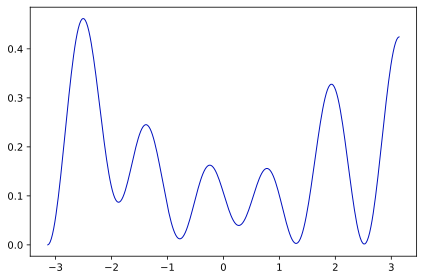

In [58]:
# Create figure using matplotlib
fig = plt.figure(tight_layout=True)    

# Create position space plot showing the absolute square of the projection 
# onto position space. A matplotlib axis is automatically created.
# The class <Postion_Space_Plot> inherits form <Updatable_Plot>                        
position_plot = up.Position_Space_Plot(state, "abs_square", fig)    

# Create matplotlib lines and add them to the axis created above
lines = position_plot.plot()

#### Manipulating `Updatable_Plot` object

After creation, basic parameters of any `Updatable_Plot` object can be manipulated. These manipulations concern visual details such as line color or width but also physical parameters such as the time $t$. Other physical quantities that are directly related to the state $\lvert \psi(t) \rangle$, can be adjusted by manipulating the `Particle_in_Box_State` object. Further modifications concerning the matplotlib objects involved, can be achieved by accessing the `Axes` or `Line2D` objects.

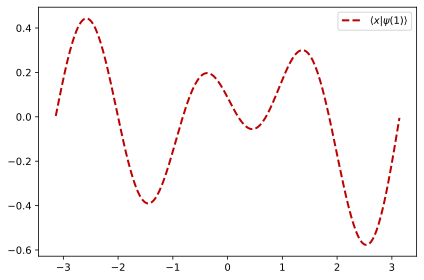

In [64]:
# Create figure
fig = plt.figure(tight_layout=True)

# Create position space plot
position_plot = up.Position_Space_Plot(state, "abs_square", fig)

# Setting mode to 'real' in order to plot the real part of the projection onto 
# position space instead of the absolute square which the object was set to at 
# creation
position_plot.set_mode("real")

# Change line color, width and style
position_plot.plot_config(color=up.dark_red, linewidth=2, linestyle="--")

# Set time
position_plot.set_t(1)

# Manipulate the <Particle_in_Box_State>
# It is unlikely that you will need to manipulate the state after creation of 
# the plot object.
# Still, it is important to keep in mind that any modification of the state
# affects the plot object even after its creation.
state.case = "dirichlet"

# Plot the real part of the projection and return matplotlib <Line2D>
lines = position_plot.plot()

# Since the plotting method 'plot' returns a matplotlib object, any further 
# modifications of the plot concerning its appearance can be achieved by 
# manipulating the <Line2D> object. We may e.g. add a label to the line to 
# later include it in a legend.
lines.set_label(r"$\langle x \vert \psi(1) \rangle$")

# To e.g. include a legend in our plot, we need to access the matplotlib
# <Axes> object which has been created when construction the 
# <Position_Space_Plot> object.
ax = position_plot.axis
legend = ax.legend()

#### Animating `Updatable_Plot`

Any `Updatable_Plot` objects supports animation of certain physical parameters. The most straight forward parameter to animate is the time $t$ to visually examine the time evolution of the state. To create such animations, the library wraps functionality of the `matplotlib.animation.FuncAnimation` object. The following snippet shows how to create an animation of the time evolution of the position distribution.

In [63]:
# Create figure
fig = plt.figure(tight_layout=True)

# Create position space plot
position_plot = up.Position_Space_Plot(state, "abs_square", fig)

# Create animation of t over the interval [0, T] for T being the revival time, 
# i.e. the time when the position distribution has reached its initial state
# again (the existence of such revivals is a peculiarity of the box potential)
T = up.revival_time(state)
# Below, we create an animation with a duration of 5 sec and 20 fps
anim = position_plot.anim("t", 0, T, 20, 20)
plt.close()
# Save the animation using the anim.save("animname.mp4") method of matplotlib
# Below, the result generated on this system is shown. To create a satisfying 
# result, the code should be executed form a normal python file, but not from
# a notebook cell!

### ...with `Update_Plot_Collection` objects

#### Creating `Update_Plot_Collection`

To create a more elaborate plot that also indicates the position expectation value as well as real and imaginary part of the position space wave functions, the following workflow may be applied:

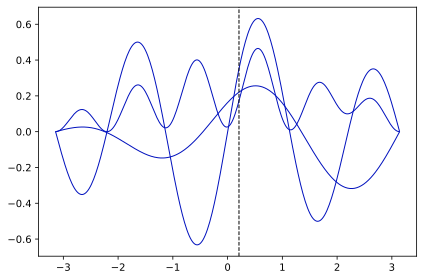

In [61]:
# Create figure using matplotlib 
fig = plt.figure(tight_layout=True)

# Create matplotlib axis to contain the lines we create in the following
ax = fig.add_subplot()

# Create position space plot showing the absolute square
pos_space_abs_square = up.Position_Space_Plot(state, "abs_square", fig, ax)

# Create position space plots showing the real and the imaginary part
pos_space_real = up.Position_Space_Plot(state, "real", fig, ax)
pos_space_imag = up.Position_Space_Plot(state, "imag", fig, ax)

# Create line to indicate the position expectation value
pos_space_expectation_value = up.Position_Expectation_Value(state, fig, ax)

# Unite the above crated objects into an <Update_Plot_Collection> to synchronize
# the creation of matplotlib lines with one single 'plot' command
pos_space_plot = up.Update_Plot_Collection(fig, pos_space_abs_square, pos_space_real, pos_space_imag, pos_space_expectation_value)

# Create matplotlib lines and add them to the axis created above
# Notice that this is equivalent to calling the 'plot' method on all of the 
# objects created above
pos_space_plot.plot()

#### Manipulating `Update_Plot_Collection`

#### Manipulating the State $\lvert \psi \rangle$

#### Animating `Update_Plot_Collection`

### ...with template functions

#### Creating `Update_Plot_Collection` objects using template functions

## Special States (Gaussian shaped wave packages)

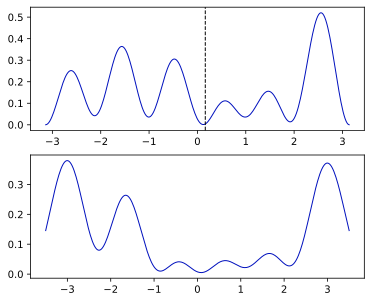

In [62]:
fig = plt.figure(figsize=(6,5))
gs = fig.add_gridspec(nrows=2, ncols=1)
pos_ax = fig.add_subplot(gs[0,0])
momentum_ax = fig.add_subplot(gs[1,0])

position_plot = up.position_space_plot(state, fig, pos_ax)
momentum_plot = up.momentum_space_plot(state, fig, momentum_ax)
plots = up.Update_Plot_Collection(fig, position_plot, momentum_plot)

plots.set_t(1)
plots.plot()

![image](../img/simple_demo.svg)